In [23]:
#importing the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn import preprocessing 
import time
import matplotlib.pyplot as plt 
#Let's import afew ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [2]:
#Import the dataset 
df=pd.read_csv('corona.csv')

In [4]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [11]:
df['Deaths'].sort_values(ascending=False)

6438    3122.0
6162    3111.0
5890    3099.0
5632    3085.0
5383    3075.0
         ...  
4073       0.0
4074       0.0
4075       0.0
4076       0.0
0          0.0
Name: Deaths, Length: 6722, dtype: float64

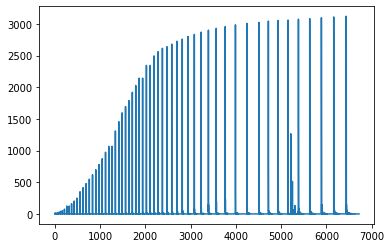

In [13]:
plt.plot(df['Deaths'])

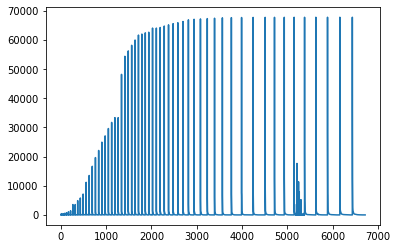

In [14]:
plt.plot(df['Confirmed'])

In [25]:
#Let's see the no. of countries that got affected
print("No of countries getting affected   :",df['Country/Region'].nunique())

No of countries getting affected   : 179


Text(0.5, 0, 'Date')

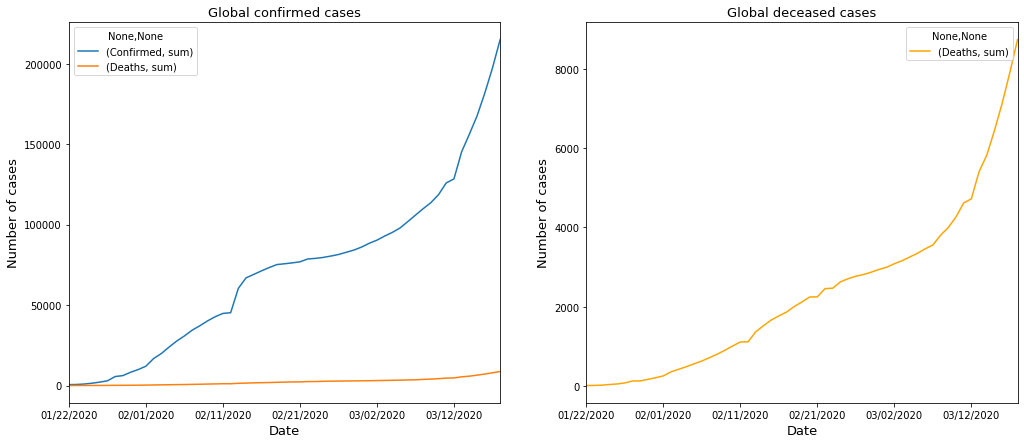

In [31]:
'''The dataset covers 163 countries and almost
2 full months from 2020, which is enough data to get some clues about the pandemic.
Let's see some plots of the worldwide tendency to see if we can extract some insights:'''
confirmed_country = df.groupby(['Country/Region']).agg({'Confirmed':['sum']})
fatalities_country = df.groupby(['Country/Region']).agg({'Deaths':['sum']})
confirmed_total_date = df.groupby(['ObservationDate']).agg({'Confirmed':['sum']})
fatalities_total_date = df.groupby(['ObservationDate']).agg({'Deaths':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

